In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [5]:
df = pd.read_csv('players_3120.csv')

In [6]:
df.head(10)

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,14,1875,377,3,49,72,83,84,28,NaN
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,8,1651,351,1,72,54,61,70,44,NaN
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,6,1897,409,1,85,74,78,85,31,NaN
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,8,1644,353,1,72,50,59,66,52,NaN
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,10,1960,405,1,72,70,80,81,52,NaN
5,C. Chaplin CAM,26,74,75,Ipswich Town\n2021 ~ 2026,225667,"168cm / 5'6""",69kg / 152lbs,Left,75,...,12,1991,409,1,82,75,69,76,46,NaN
6,Y. Moukoko ST,18,77,87,Borussia Dortmund\n2020 ~ 2026,240833,"179cm / 5'10""",72kg / 159lbs,Left,79,...,13,1857,393,2,80,75,59,80,34,NaN
7,K. Havertz CAM CM ST,24,82,87,Arsenal\n2023 ~ 2028,235790,"193cm / 6'4""",82kg / 181lbs,Left,85,...,12,2083,440,3,78,81,79,83,49,NaN
8,J. Bellingham CAM CM,20,88,92,Real Madrid\n2023 ~ 2029,252371,"186cm / 6'1""",75kg / 165lbs,Right,90,...,8,2282,490,4,80,82,81,87,78,NaN
9,L. Davis LB LWB,23,74,80,Ipswich Town\n2022 ~ 2025,246685,"182cm / 6'0""",70kg / 154lbs,Left,75,...,13,1941,412,1,79,50,73,71,68,NaN


In [7]:
df_clean = df.copy()

In [8]:
df_clean.head(10)

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,14,1875,377,3,49,72,83,84,28,NaN
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,8,1651,351,1,72,54,61,70,44,NaN
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,6,1897,409,1,85,74,78,85,31,NaN
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,8,1644,353,1,72,50,59,66,52,NaN
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,10,1960,405,1,72,70,80,81,52,NaN
5,C. Chaplin CAM,26,74,75,Ipswich Town\n2021 ~ 2026,225667,"168cm / 5'6""",69kg / 152lbs,Left,75,...,12,1991,409,1,82,75,69,76,46,NaN
6,Y. Moukoko ST,18,77,87,Borussia Dortmund\n2020 ~ 2026,240833,"179cm / 5'10""",72kg / 159lbs,Left,79,...,13,1857,393,2,80,75,59,80,34,NaN
7,K. Havertz CAM CM ST,24,82,87,Arsenal\n2023 ~ 2028,235790,"193cm / 6'4""",82kg / 181lbs,Left,85,...,12,2083,440,3,78,81,79,83,49,NaN
8,J. Bellingham CAM CM,20,88,92,Real Madrid\n2023 ~ 2029,252371,"186cm / 6'1""",75kg / 165lbs,Right,90,...,8,2282,490,4,80,82,81,87,78,NaN
9,L. Davis LB LWB,23,74,80,Ipswich Town\n2022 ~ 2025,246685,"182cm / 6'0""",70kg / 154lbs,Left,75,...,13,1941,412,1,79,50,73,71,68,NaN


In [9]:
def clean_attribute(value):
    if isinstance(value, str):
        match = re.match(r'^\d+', value)
        if match:
            return int(match.group(0))
    return value

In [10]:
attribute_columns = [
    'Overall rating', 'Potential', 'Total attacking', 'Crossing', 'Finishing',
    'Heading accuracy', 'Short passing', 'Volleys', 'Total skill', 'Dribbling',
    'Curve', 'FK Accuracy', 'Long passing', 'Ball control', 'Total movement',
    'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance',
    'Total power', 'Shot power', 'Jumping', 'Stamina', 'Strength', 'Long shots',
    'Total mentality', 'Aggression', 'Interceptions', 'Att. Position',
    'Vision', 'Penalties', 'Composure', 'Total defending', 'Defensive awareness',
    'Standing tackle', 'Sliding tackle', 'Total goalkeeping', 'GK Diving',
    'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'
]

In [11]:
for col in attribute_columns:
    df_clean[col] = df_clean[col].apply(clean_attribute).astype(float)

In [12]:
df_clean.head(20)

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,15 Ronaldinho CAM ST,34,78.0,78.0,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,14.0,1875,377,3,49,72,83,84,28,NaN
1,O. Hutchinson RM CAM,19,65.0,81.0,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,8.0,1651,351,1,72,54,61,70,44,NaN
2,Brahim CAM,23,82.0,86.0,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,6.0,1897,409,1,85,74,78,85,31,NaN
3,K. Wätjen CM,17,62.0,80.0,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,8.0,1644,353,1,72,50,59,66,52,NaN
4,A. Güler CAM RM,18,77.0,88.0,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,10.0,1960,405,1,72,70,80,81,52,NaN
5,C. Chaplin CAM,26,74.0,75.0,Ipswich Town\n2021 ~ 2026,225667,"168cm / 5'6""",69kg / 152lbs,Left,75,...,12.0,1991,409,1,82,75,69,76,46,NaN
6,Y. Moukoko ST,18,77.0,87.0,Borussia Dortmund\n2020 ~ 2026,240833,"179cm / 5'10""",72kg / 159lbs,Left,79,...,13.0,1857,393,2,80,75,59,80,34,NaN
7,K. Havertz CAM CM ST,24,82.0,87.0,Arsenal\n2023 ~ 2028,235790,"193cm / 6'4""",82kg / 181lbs,Left,85,...,12.0,2083,440,3,78,81,79,83,49,NaN
8,J. Bellingham CAM CM,20,88.0,92.0,Real Madrid\n2023 ~ 2029,252371,"186cm / 6'1""",75kg / 165lbs,Right,90,...,8.0,2282,490,4,80,82,81,87,78,NaN
9,L. Davis LB LWB,23,74.0,80.0,Ipswich Town\n2022 ~ 2025,246685,"182cm / 6'0""",70kg / 154lbs,Left,75,...,13.0,1941,412,1,79,50,73,71,68,NaN


In [13]:
def convert_currency(value):
    """Converts a currency string to a float."""
    if isinstance(value, str):
        value = value.replace('€', '')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
    return float(value)

In [14]:
for col in ['Value', 'Wage', 'Release clause']:
    df_clean[col] = df_clean[col].apply(convert_currency)

In [15]:
def convert_height(height_str):
    """Extracts height in cm from the string."""
    if isinstance(height_str, str):
        return int(height_str.split('cm')[0])
    return height_str

In [16]:
def convert_weight(weight_str):
    """Extracts weight in kg from the string."""
    if isinstance(weight_str, str):
        return int(weight_str.split('kg')[0])
    return weight_str

In [17]:
df_clean['Height_cm'] = df_clean['Height'].apply(convert_height)
df_clean['Weight_kg'] = df_clean['Weight'].apply(convert_weight)

In [18]:
df_clean.head(10)

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64,Height_cm,Weight_kg
0,15 Ronaldinho CAM ST,34,78.0,78.0,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,377,3,49,72,83,84,28,NaN,182,76
1,O. Hutchinson RM CAM,19,65.0,81.0,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,351,1,72,54,61,70,44,NaN,174,65
2,Brahim CAM,23,82.0,86.0,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,409,1,85,74,78,85,31,NaN,170,68
3,K. Wätjen CM,17,62.0,80.0,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,353,1,72,50,59,66,52,NaN,178,72
4,A. Güler CAM RM,18,77.0,88.0,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,405,1,72,70,80,81,52,NaN,175,70
5,C. Chaplin CAM,26,74.0,75.0,Ipswich Town\n2021 ~ 2026,225667,"168cm / 5'6""",69kg / 152lbs,Left,75,...,409,1,82,75,69,76,46,NaN,168,69
6,Y. Moukoko ST,18,77.0,87.0,Borussia Dortmund\n2020 ~ 2026,240833,"179cm / 5'10""",72kg / 159lbs,Left,79,...,393,2,80,75,59,80,34,NaN,179,72
7,K. Havertz CAM CM ST,24,82.0,87.0,Arsenal\n2023 ~ 2028,235790,"193cm / 6'4""",82kg / 181lbs,Left,85,...,440,3,78,81,79,83,49,NaN,193,82
8,J. Bellingham CAM CM,20,88.0,92.0,Real Madrid\n2023 ~ 2029,252371,"186cm / 6'1""",75kg / 165lbs,Right,90,...,490,4,80,82,81,87,78,NaN,186,75
9,L. Davis LB LWB,23,74.0,80.0,Ipswich Town\n2022 ~ 2025,246685,"182cm / 6'0""",70kg / 154lbs,Left,75,...,412,1,79,50,73,71,68,NaN,182,70


In [19]:
df_clean['Value']

0        4100000.0
1        1800000.0
2       43500000.0
3        1000000.0
4       22000000.0
           ...    
3115     1600000.0
3116      825000.0
3117     2900000.0
3118      250000.0
3119     4200000.0
Name: Value, Length: 3120, dtype: float64

In [20]:
df_clean = df_clean.drop(['Height', 'Weight', 'Team & Contract', 'ID', 'name', 'Best position'], axis=1)

In [21]:
df_clean = pd.get_dummies(df_clean, columns=['foot'], drop_first=True)

In [22]:
for col in df_clean.columns:
    if df_clean[col].isnull().any():
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)


/var/folders/kh/myyf5mv91c7d89jm_947j3wc0000gn/T/ipykernel_57774/506145370.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)


In [23]:
df_clean.shape

(3120, 61)

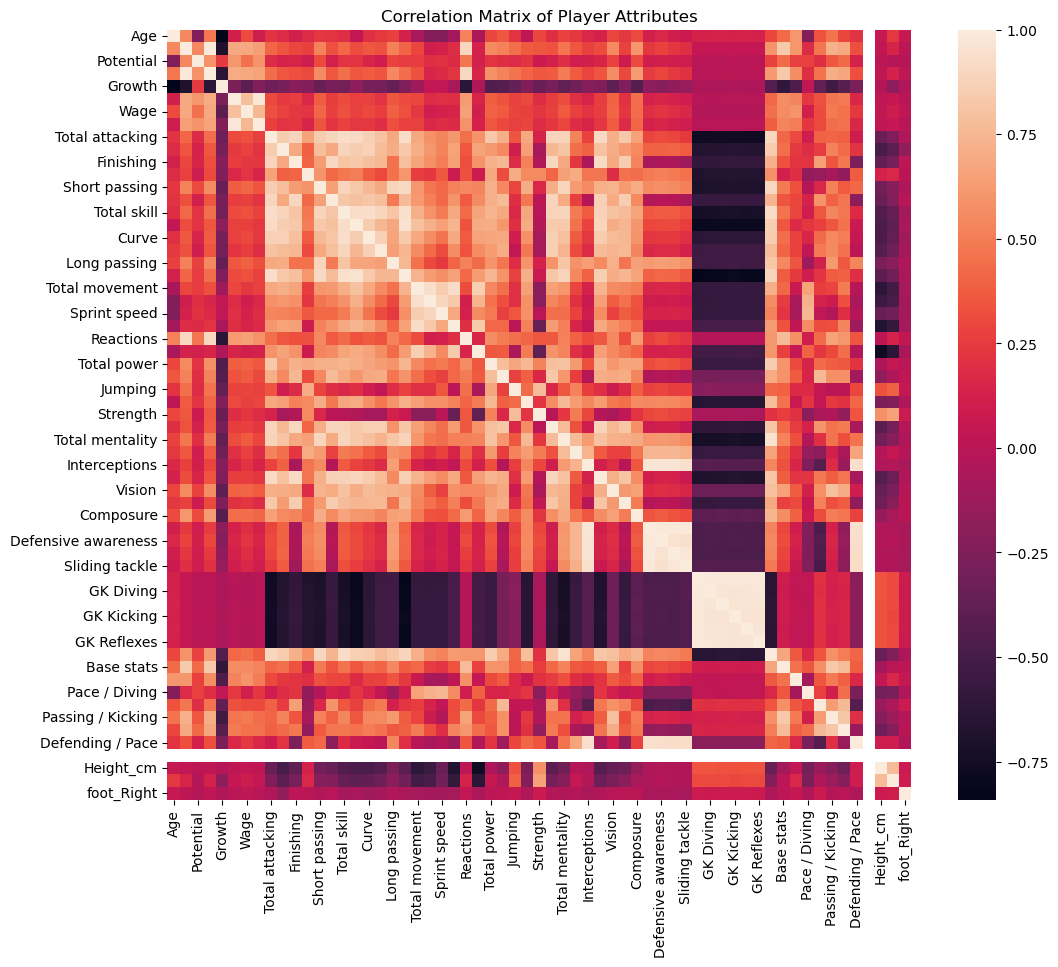

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(numeric_only=True))
plt.title('Correlation Matrix of Player Attributes')
plt.show()

TypeError: ticklabel_format() got an unexpected keyword argument 'color'

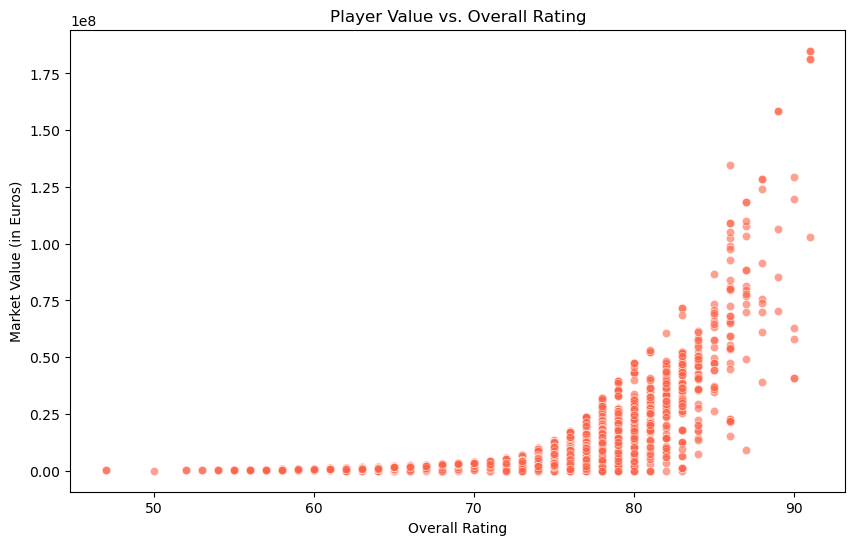

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Overall rating', y='Value', alpha=0.6,c='tomato')
plt.title('Player Value vs. Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Market Value (in Euros)')
plt.ticklabel_format(style='plain', axis='y',color='red')
plt.show()

In [26]:
X = df_clean.drop('Value', axis=1)
y = df_clean['Value']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [29]:
X_train_scaled.shape[0]

2496

In [30]:
X_test_scaled.shape[0]

624

In [31]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [32]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [33]:
y_pred = model.predict(X_test_scaled)

In [34]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [35]:
print(f"  - R-squared (R²): {r2:.2f}")
print(f"  - Mean Absolute Error (MAE): €{mae:,.2f}")

  - R-squared (R²): 0.99
  - Mean Absolute Error (MAE): €730,018.43


In [36]:
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [37]:
feature_importances.head(10)

,feature,importance
6,Release clause,0.914362
3,Best overall,0.036389
2,Potential,0.012669
5,Wage,0.004192
1,Overall rating,0.003912
0,Age,0.003746
21,Sprint speed,0.002482
9,Finishing,0.001598
50,International reputation,0.001558
54,Dribbling / Reflexes,0.001264


In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))